In [354]:
!pip install ucimlrepo

In [355]:
%matplotlib inline


import itertools, collections
import numpy as np
import pandas as pd
from collections import Counter

from ucimlrepo import fetch_ucirepo


In [356]:

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


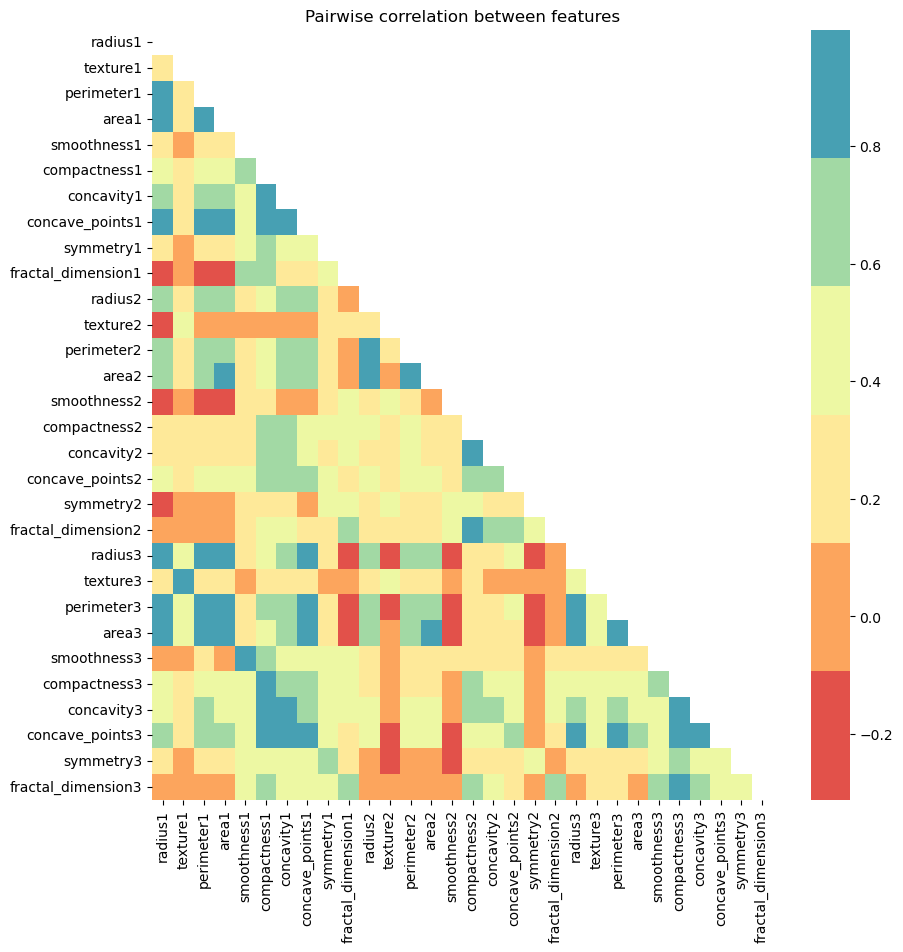

In [358]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

In [361]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

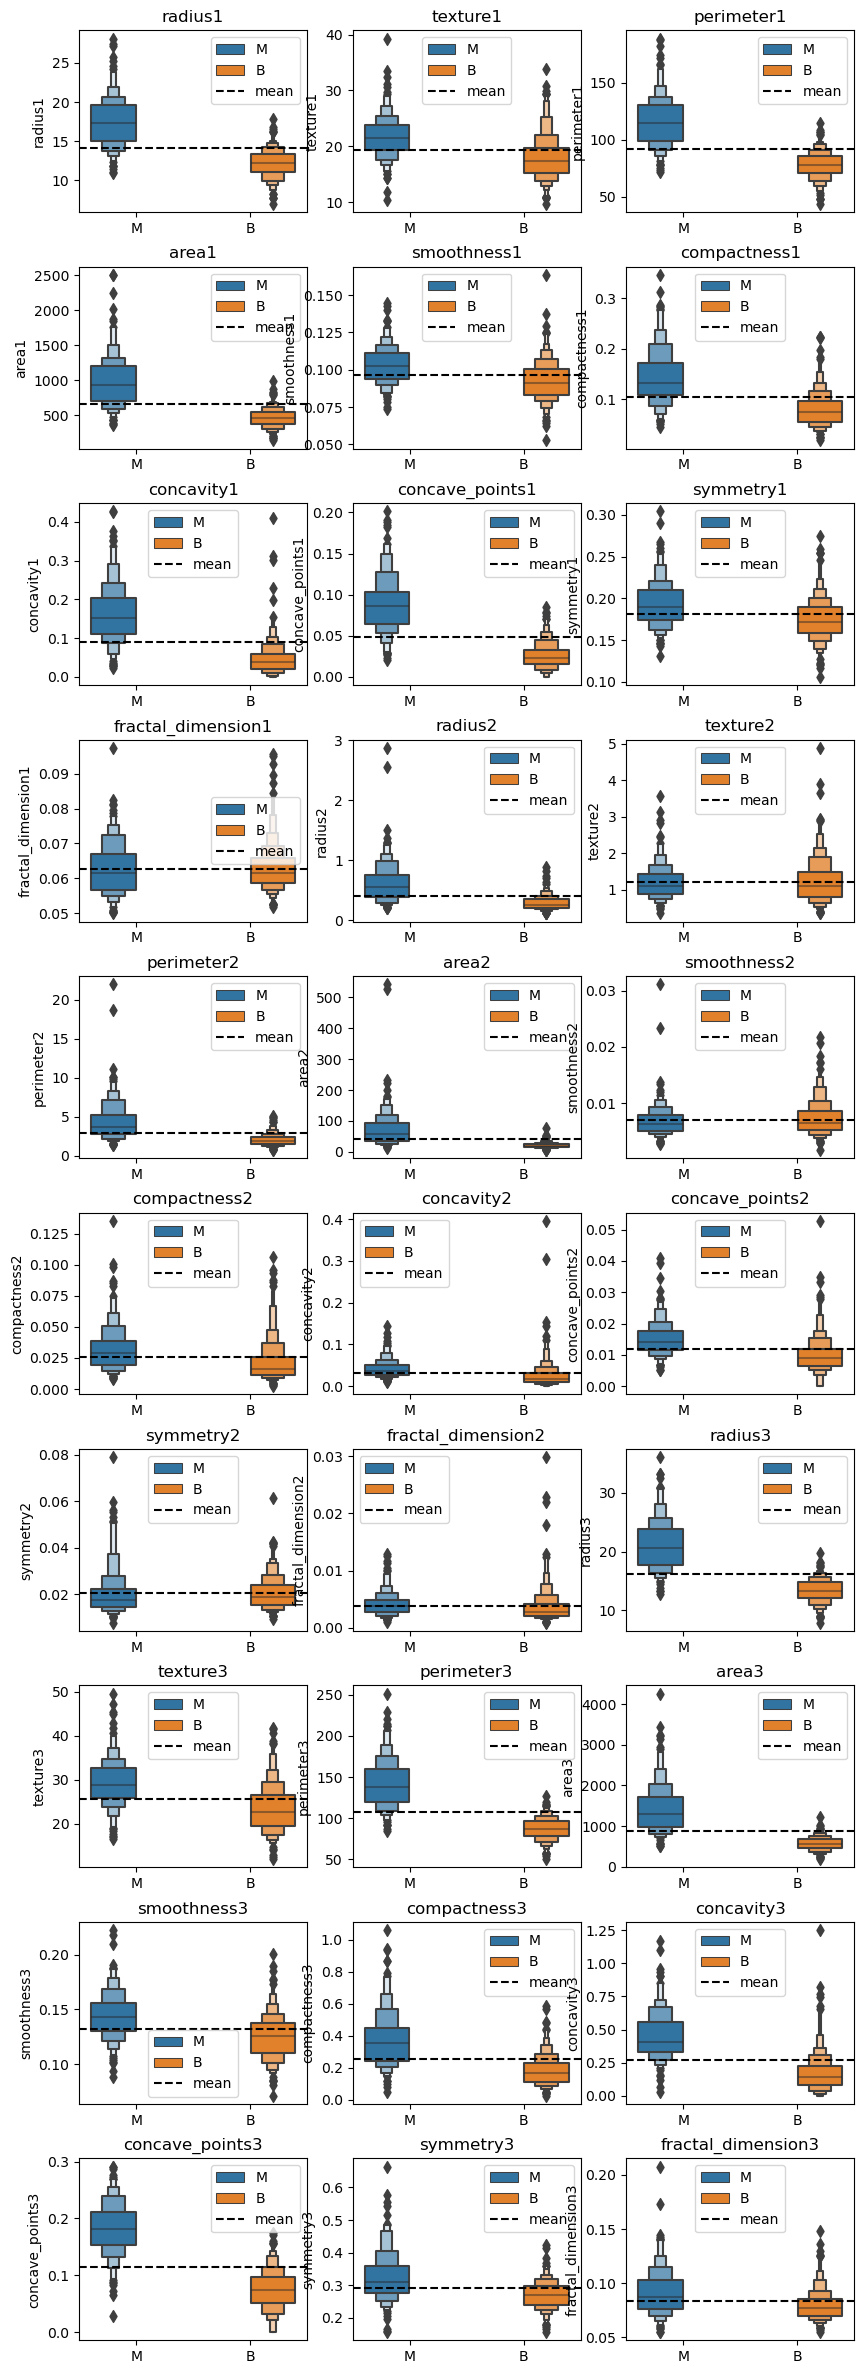

In [364]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [487]:


# Node class for the decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

# Decision tree class
class DecisionTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self.grow_tree(X, y)

    # Grow tree recursively
    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stopping condition
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Select the best feature
        best_feature = self._best_feature(X, y)
        X_left, X_right, y_left, y_right = self._split(X, y, best_feature)

        if len(y_left) == 0 or len(y_right) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Recursively grow left and right children
        left_child = self.grow_tree(X_left, y_left, depth + 1)
        right_child = self.grow_tree(X_right, y_right, depth + 1)
        return Node(feature=best_feature, left=left_child, right=right_child)

    def _split(self, X, y, feature):
        feature_values = X[:, feature]
        median_value = np.median(feature_values)

        left_indices = feature_values <= median_value
        right_indices = feature_values > median_value

        return X[left_indices], X[right_indices], y[left_indices], y[right_indices]

    def _best_feature(self, X, y):
        # Calculate information gain for all features
        gains = [self.information_gain(X, y, i) for i in range(X.shape[1])]
        return np.argmax(gains)

    def information_gain(self, X, y, feature_index):
        total_entropy = self.entropy(y)
        feature_values = X[:, feature_index]
        unique_values, counts = np.unique(feature_values, return_counts=True)
        
        weighted_entropy = np.sum([
            (counts[i] / np.sum(counts)) * self.entropy(y[feature_values == unique_values[i]])
            for i in range(len(unique_values))
        ])
        
        info_gain = total_entropy - weighted_entropy
        return info_gain

    def entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        entropy_value = -np.sum([(count / len(y)) * np.log2(count / len(y)) for count in counts])
        return entropy_value

    def _most_common_label(self, y):
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= np.median(x[node.feature]):
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)




In [489]:
# 10-fold cross-validation
def evaluate_model(X, y, model):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate F1 score and save it
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
    
    # Calculate mean and standard deviation of F1 scores
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    return mean_f1, std_f1


# Initialize and evaluate decision tree model
tree_model = DecisionTree(max_depth=10)
mean_f1, std_f1 = evaluate_model(X, y, tree_model)



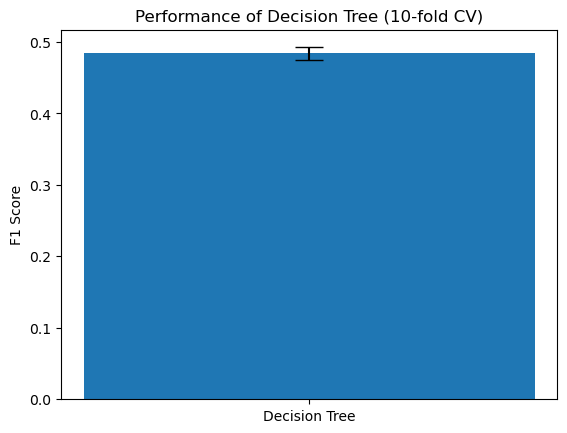

In [490]:
# Plot the performance
plt.bar(['Decision Tree'], [mean_f1], yerr=[std_f1], capsize=10)
plt.ylabel('F1 Score')
plt.title('Performance of Decision Tree (10-fold CV)')
plt.show()

In [493]:
# def confusion_matrix(y_true, y_pred):
#     # Calculate the elements of the confusion matrix
#     TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
#     TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
#     FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
#     FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
#     # Create a confusion matrix
#     matrix = np.array([[TN, FP], [FN, TP]])
#     return matrix


# y_true = X_test
# y_pred = y_test 

# # Calculate and print the confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix:\n", cm)

ValueError: operands could not be broadcast together with shapes (114,30) (114,) 